# Product Ranking Optimization | A/B Testing Project



## Problem description
Suppose that an online grocery store called “Rimi” wants to test a new ranking algorithm to provide products more relevant to customers.

![screenshot from Rimi website ](images/rimi.png)

## Methodology

1. **Problem statement** - What is the goal of the experiment?
    - Understanding the nature of the product
    - Asking clarifying questions:
        - What is the user journey?
        - What is the success metric? It should be:
            - Measurable
            - Attributable
            - Sensitive
            - Timely
2. **Hypothesis testing** - What result do you hypothesize from the experiment?
    - Set up: 
        - Null hypothesis 
        - Alternative hypothesis 
        - Significance level
        - Statistical power
        - Minimum detectable effect (MDE)
3. **Design the Experiment** - What are your experiment parameters?
    - Determine:
        - Randomization unit
        - Target population in the experiment
        - Sample size
        - Duration of the experiment
4. **Data Generation** - What are the requirements for running an experiment?
    - Determine: 
        - Key columns
        - Probability distributions 
    - Write code to generate data
5. **Validity Checks** - Did the experiment run soundly without errors or bias?
    - Check for:
        - Instrumentation Effect
        - External Factors
        - Selection Bias
        - Sample Ratio Mismatch
        - Novelty Effect
6. **A/B Testing** - Is the observed change in the metric both statistically and practically significant?
    - Run statistical tests
    - Assess the observed lift:
        - P-value
        - Confidence intervals
7. **Launch Decision** - Based on the results and trade-offs, should the change be launched?
    - Consider:
        - Metric Trade-Offs
        - Cost of Launching

## Step 1 - Problem Statement

### Understanding the Nature of the Product

Rimi is an online grocery store that offers a wide range of products, including fresh produce, meat, dairy, baked goods, and more. The store uses a product ranking system or recommendation algorithm.

When a user enters keywords such as "meat" or "fruits," this algorithm generates a list of products that could be relevant to that customer, based on factors like their profile, purchase history, and other data.

If we modify this ranking algorithm, the suggested products may become more relevant to customers, which in turn should **boost sales** for the online store.


### User Journey 

![user_funnel.drawio.png](images/user_funnel.drawio.png)

Considering the user journey is crucial because it helps determine key factors later on, such as defining the success metric, identifying the target user population, and deciding at which stage of the journey a user should be considered as a participant in the experiment.

### Define the Success Metric

To define the success metric, we need to consider the folowing guiding princeples:
1. **Measurable**
    - Is it a type of user behavior that can be accurately captured through your instrumentation or platform?
2. **Attributable**
    - "Attributable" means establishing a clear link between the experiment and the observed changes in metrics.
    - Example: If you are testing a new website design (treatment) and notice an increase in conversions (metric), for the result to be considered "attributable," you need to be sure that the increase is specifically due to the design change, and not, for example, due to an increase in traffic or a marketing campaign that occurred during the same period.
3. **Sensitive**
    - A metric is considered "sensitive" if it is responsive enough to detect significant effects from the applied modification.
    - You want to identify a metric with low variability to increase the likelihood of detecting true effects.
4. **Timely**
    - A/B experiments need to be very quick, it's a very iterative process as a way to improve the product very quickly.
    - Therefore, consider what short-term behavior can serve as a proxy for the long-term desired behavior.


Our success metric is **Conversion Rate**, which we aim to increase. However, it's crucial that this improvement does not come at the expense of the **Average Revenue Per User (ARPU)**, which should remain stable or improve.


## Step 2 - Hypothesis testing


### State the Hypothesis Statement

**Conversion Rate Hypotheses**:
- Null Hypothesis (H0): The сonversion rate between the old and new ranking algorithms is the same.
- Alternative Hypothesis (Ha): The conversion rate between the old and new ranking algorithms is different.

**ARPU Hypotheses**:
- Null Hypothesis (H0): The ARPU between the old and new ranking algorithms is the same.
- Alternative Hypothesis (Ha): The ARPU between the old and new ranking algorithms is different.

### Set the Significance Level

**Alpha** = 0.05 <br> 
- If the p-value is less than 0.05, reject H0 and conclude that Ha is true.



### Set the Statistical Power

**Statistical Power** = 0.8 <br> 
- Statistical power is the probability of detecting an effect if the alternative hypothesis is true.



### Set the Minimum Detectable Effect (MDE)

**MDE** = 0.3% <br> 
- If the change in conversion rate is at least 0.3% or higher, it is considered practically significant.
- 0.3% MDE: This is a good balance, it’s sensitive enough to detect meaningful changes in revenue, while also being realistic in terms of sample size and experiment duration.

## Step 3 - Design the Experiment

### Set the Randomization Unit

**Randomization Unit** = User <br>
- This unit determines how participants are randomly assigned to groups (control and test) for the experiment. The individual user is the most common randomization unit, especially in digital A/B tests.


### Target Population in the Experiment

**Users** = Visitors who searches a product

- ![user_funnel.drawio.png](images/user_funnel.drawio.png)


### Determine the Sample Size

We cam use Python, specifically the `statsmodels` library, and the `NormalIndPower().solve_power()` method to estimate the sample size. This method is based on the following formula for sample size estimation:

$$n = \left( \frac{Z_{\alpha/2} + Z_\beta}{\frac{\delta}{\sqrt{p(1-p)}}} \right) ^ 2 $$

Where:
- $n$ — This is the required sample size for each group (control and experimental).
- $Z_{\alpha/2}$ — This is the critical value of the normal distribution for the significance level ($\alpha$). It is set as $\alpha/2$ because we often use a two-tailed test. For example, for a significance level of 0.05, the value of $Z_{\alpha/2}$ is approximately 1.96.
- $Z_\beta$ — This is the critical value for the test power ($\beta$). For example, for a power of 0.8, the value of $Z_\beta$  is approximately 0.84.
- $p$ — This is the current base conversion rate (e.g. 4%).
- $\delta$ —  This is the minimum detectable effect (MDE). It is the difference between the means of the control and experimental groups that you want to detect. The smaller $\delta$, the larger the sample size needed to accurately detect this difference.
<br>
<br>

#### Assumptions
Since we don't have any real metrics data, we'll estimate what they might look like based on industry averages.

##### Estimating Conversion Rate
1. The conversion rate for online grocery stores is the percentage of users who complete a purchase out of the total number of website visitors.
2. Typical industry data:
    - Based on ChatGPT’s response, on average, the conversion rate for online grocery stores can range from 2% to 5%. However, grocery stores have a certain specificity — if a customer visits with the intent to buy groceries, the conversion rate might be higher compared to apparel or electronics stores.
    - For large retailers like Rimi, the conversion rate may be closer to the upper end of this range.
3. Assumption:
    - **Conversion rate** = 4% (which corresponds to the conversion rate for a typical online grocery store).

##### Estimating ARPU
1. The average revenue per user (ARPU) in online grocery stores can vary significantly depending on how often customers place orders, their average basket size, and other factors.
2. Typical industry data:
    - ChatGPT suggests that ARPU for online grocery retailers often ranges from 20 to 100 euros, depending on the region and shopping frequency. The standard deviation, on average, can range from 20% to 50% of the average ARPU.
3. Assumption:
    - **Average ARPU** = 50 euros

#### Calculations

We can easily calculate this using Python and the `statsmodels` library.

In [266]:
from statsmodels.stats.power import NormalIndPower

# Define parameters
alpha = 0.05  # Significance level
power = 0.8   # Test power
baseline_conversion = 0.04  # Current conversion rate (4%)
mde = 0.003  # Minimum detectable effect (e.g., 0.3%)
effect_size = mde / baseline_conversion  # Effect size

sample_size = NormalIndPower().solve_power(effect_size=effect_size,
                                           alpha=alpha, 
                                           power=power, 
                                           alternative='two-sided')

# Round to the nearest integer
sample_size = int(sample_size)

sample_size

2790

### Duration of the Experiment

**Duration** = 1 to 2 weeks
- *"Typical duration of the experiment is 1 to 2 weeks. You don’t want to run the experiment for less than one week, because you want to account for the day of the week effect, meaning there could be some underlying difference in terms of how the user engages with the website during the weekdays versus the weekends" (Daniel Lee, 2022).*


## Step 4 - Data Generation

### Dataset Description

Since we do not have access to real-world data, we have generated a **synthetic dataset** that simulates user behavior based on realistic assumptions and probability distributions. This dataset allows us to mimic an online grocery store scenario for testing purposes.

The script used to generate this dataset can be found in the `data_generation.ipynb` file, available [here](https://github.com/S0la1re/Product-Ranking-AB-Testing/blob/Development/data_generation.ipynb).

#### Key Columns
- **user_id**: A unique identifier for each user.
- **group**: Either 'control' or 'experiment', indicating whether the user belongs to the control group or the experiment group.
- **session_date**: The date and time of the user's session.
- **product_views**: The number of products viewed by the user during the session.
- **cart_adds**: The number of items added to the cart.
- **purchase_amount**: The total amount spent by the user in the session (if any purchase was made).
- **session_duration**: The duration of the session in minutes.
- **device_type**: The type of device used by the user (mobile, desktop, or tablet).
- **traffic_source**: The source of traffic that brought the user to the site (organic, paid ad, or direct).
- **region**: The region where the user is located (Estonia, Latvia, Lithuania).
- **visitor_type**: Whether the user is a "new" or "old" visitor (new or returning customer).


#### Variables and Distributions
1. **Session Date**:
    - **Distribution**: Randomly assigned from a uniform distribution over a specific date range with an hourly frequency.
    - **Assumption**: User sessions are evenly distributed throughout the experiment period without any special temporal effects.
2. **Product Views & Cart Adds**:
    - **Distribution**: Both follow **Poisson distributions**.
        - `product_views`: $\lambda$ = 5.
        - `cart_adds`: $\lambda$ = 2
    - **Assumption**: The number of products viewed and items added to the cart by users occurs randomly but follows a discrete count distribution typical for e-commerce behavior.
3. **Session Duration**:
    - **Distribution**: **Exponential distribution** with a scale parameter of 10 (minutes).
    - **Assumption**: Most sessions are short, with a few longer sessions, mimicking user behavior in online shopping where session duration has a long tail.
4. **Device Type**:
    - **Distribution**: Categorical with probabilities:
        - Mobile: 70%
        - Desktop: 25%
        - Tablet: 5%
    - **Assumption**: Most users access the site via mobile, reflecting common device usage patterns in online retail.
5. **Traffic Source**:
    - **Distribution**: Categorical with probabilities:
        - Organic: 50%
        - Paid Ad: 30%
        - Direct: 20%
    - **Assumption**: A majority of users come from organic search, followed by paid ads and direct traffic.
6. **Region**:
    - **Distribution**: Categorical with probabilities:
        - Estonia: 30%
        - Latvia: 40%
        - Lithuania: 30%
    - **Assumption**: User distribution is balanced across three Baltic countries based on approximate population sizes.
7. **Visitor Type**:
    - **Distribution**: Categorical with probabilities:
        - New visitors: 30%
        - Returning visitors: 70%
    - **Assumption**: Returning visitors constitute the majority of the traffic, typical for e-commerce platforms.
8. **Purchase Amount**:
    - **Distribution**: Mixed distribution combining:
        - **Exponential distribution** for smaller purchases (scale = ARPU/3).
        - **Log-normal distribution** for larger purchases (mean = log(ARPU), sigma = 0.5).
        - Users have a 70% probability of making smaller purchases and a 30% probability of larger ones.
    - **Assumption**: Most users make small purchases, but a significant minority makes larger purchases. The distribution is driven by ARPU (Average Revenue Per User) and conversion rate, which are specified for both control and experiment groups.

### Import Libraries

In [267]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [268]:
df = pd.read_csv('rimi_ab_test.csv')

# Create a 'conversion' column based on the presence of a purchase
df['conversion'] = df['purchase_amount'].apply(lambda x: 1 if x > 0 else 0)

df.head()


,user_id,group,session_date,product_views,cart_adds,purchase_amount,session_duration,device_type,traffic_source,region,visitor_type,conversion
0,1,control,2024-08-10 23:00:00,3,1,23.86,29.86,desktop,direct,Latvia,old,1
1,2,control,2024-08-13 11:00:00,5,1,0.00,7.56,mobile,organic,Latvia,new,0
2,3,control,2024-08-05 01:00:00,4,2,72.42,16.42,mobile,organic,Estonia,old,1
3,4,control,2024-08-13 06:00:00,4,0,0.00,47.79,mobile,direct,Estonia,old,0
4,5,control,2024-08-12 07:00:00,4,2,0.00,7.94,mobile,paid_ad,Lithuania,old,0


## Step 5 - Validity Checks

Before conducting any statistical tests, it is essential to perform validity checks to ensure that the experiment results are reliable. We will evaluate the following aspects:

- Instrumentation Effect
- External Factors
- Selection Bias
- Sample Ratio Mismatch
- Novelty Effect


### Instrumentation Effect

This aspect is crucial when working with real data from a platform (e.g., a website). It is necessary to verify whether any bugs or glitches could potentially impact the experiment results.

In our case, since we are using synthetic data, we have thoroughly checked our dataset, and everything appears to be in order.

**Verdict**: Pass


### External Factors

External factors can influence experiment results, such as running an experiment during holidays or during significant economic events like COVID-19 or recessions. Ideally, experiments should avoid these periods to reduce external variability.

As we are using synthetic data, we do not have to worry about such factors.

**Verdict**: Pass


### Selection Bias

Selection Bias occurs when there are significant differences between the control and experiment groups before the experiment begins. We need to confirm that the underlying distributions between the groups are **homogeneous**, ensuring they are comparable.

In [269]:
from scipy import stats

# Function to perform statistical test on a given metric
def test_metric(group1, group2, metric_name, print_result=True, test_name=False):
    """
    Function to perform normality, variance homogeneity, and appropriate statistical test
    between two groups for a given metric.

    Parameters:
    - group1, group2: DataFrames or Series representing the two groups to compare.
    - metric_name: String, the name of the metric to test.
    - print_result: Boolean, if True, will print the test results.
    - test_name: Boolean, if True, prints the name of the test performed.

    Returns:
    - p_value: p-value of the chosen statistical test.
    - significant: Boolean, True if significant difference is found, otherwise False.
    """
    # Perform normality test
    def check_normality(data):
        if len(data) > 5000:
            # Anderson-Darling test for large samples
            result = stats.anderson(data)
            return result.statistic < result.critical_values[2]
        else:
            # Shapiro-Wilk test for smaller samples
            result = stats.shapiro(data)
            return result.pvalue > 0.05

    normal_group1 = check_normality(group1)
    normal_group2 = check_normality(group2)

    # Check variance homogeneity using Levene's test
    levene_test = stats.levene(group1, group2)
    equal_variance = levene_test.pvalue > 0.05

    # Choose appropriate test based on assumptions
    if normal_group1 and normal_group2:
        if equal_variance:
            # T-test with equal variance
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
            test_name_str = "T-test"
        else:
            # Welch's T-test (unequal variances)
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_name_str = "Welch's T-test"
    else:
        # Mann-Whitney U test (non-parametric)
        t_stat, p_value = stats.mannwhitneyu(group1, group2)
        test_name_str = "Mann-Whitney U test"

    # Determine if there's a significant difference
    significant = p_value < 0.05

    # Output results
    if print_result:
        # Print p-value with scientific notation if it's very small
        if p_value < 0.0001:
            p_value_str = f"{p_value:.2e}"
        else:
            p_value_str = f"{p_value:.4f}"

        if test_name:
            print(f"{metric_name}: p-value = {p_value_str}, {test_name_str}")
        else:
            print(f"{metric_name}: p-value = {p_value_str}")
        
        if significant:
            print(f"Significant difference in {metric_name} between groups.")
        else:
            print(f"No significant difference in {metric_name} between groups.")

    return p_value, significant


In [270]:
# Split into groups
control_group = df[df['group'] == 'control']
experiment_group = df[df['group'] == 'experiment']

# Define metrics for analysis
metrics = ['product_views', 'cart_adds', 'purchase_amount', 'session_duration']

# Selection Bias Check
print("\nSelection Bias Check:")
for metric in metrics:
    test_metric(control_group[metric], experiment_group[metric], metric_name=metric, test_name=True)


Selection Bias Check:
product_views: p-value = 0.7843, Mann-Whitney U test
No significant difference in product_views between groups.
cart_adds: p-value = 0.8353, Mann-Whitney U test
No significant difference in cart_adds between groups.
purchase_amount: p-value = 0.4702, Mann-Whitney U test
No significant difference in purchase_amount between groups.
session_duration: p-value = 0.9470, Mann-Whitney U test
No significant difference in session_duration between groups.


There is no evidence of selection bias in our groups.

**Verdict**: Pass


### Sample Ratio Mismatch Check

In a well-designed experiment, approximately 50% of participants should be assigned to the control group, and 50% to the experiment group. Due to the randomization algorithm, the actual ratio may differ slightly, such as 49/51%.

Our synthetic dataset is generated with an equal number of participants in both groups. However, to ensure complete accuracy, we conducted a Chi-Square Goodness of Fit Test.

In [271]:
# Sample Ratio Mismatch Check
print("\nSample Ratio Mismatch Check:")

control_expected = 2790
experiment_expected = 2790
expected = [control_expected, experiment_expected]
observed = [len(df[df['group'] == 'control']), len(df[df['group'] == 'experiment'])]

chi2, p_value_srm = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p_value_srm:.4f}, Chi-Square Goodness of Fit Test")
if p_value_srm < 0.05:
    print("Sample Ratio Mismatch detected.")
else:
    print("No Sample Ratio Mismatch.")


Sample Ratio Mismatch Check:
Chi-Square Statistic: 0.0000, p-value: 1.0000, Chi-Square Goodness of Fit Test
No Sample Ratio Mismatch.


The p-value of 1.0 indicates that there is no significant difference between the observed and expected counts of users in each group. This confirms that the sample ratio is perfectly balanced, and there is no Sample Ratio Mismatch.

**Verdict**: Pass


### Novelty Effect Check

The Novelty Effect refers to a temporary increase in user engagement simply due to the presence of something new. To detect this, we compare key metrics between new and returning visitors.

In [272]:
# Novelty Effect Check
print("\nNovelty Effect Check:")
new_visitors = df[df['visitor_type'] == 'new']
recurrent_visitors = df[df['visitor_type'] == 'old']

for metric in metrics:
    test_metric(new_visitors[metric], recurrent_visitors[metric], metric_name=metric, test_name=True)



Novelty Effect Check:
product_views: p-value = 0.0773, Mann-Whitney U test
No significant difference in product_views between groups.
cart_adds: p-value = 0.3787, Mann-Whitney U test
No significant difference in cart_adds between groups.
purchase_amount: p-value = 0.1764, Mann-Whitney U test
No significant difference in purchase_amount between groups.
session_duration: p-value = 0.6082, Mann-Whitney U test
No significant difference in session_duration between groups.


There is no evidence of a Novelty Effect in our samples.

**Verdict**: Pass

### Summary
After conducting the validity checks, we can confidently state that our experimental setup is robust and free from significant biases:
- **Instrumentation Effect**: No issues were detected as the synthetic dataset was thoroughly validated.
- **External Factors**: Not applicable to our synthetic data, ensuring no impact from outside influences such as economic conditions or holidays.
- **Selection Bias**: Both control and experiment groups were found to be homogeneous, with no significant differences in key metrics before the experiment began.
- **Sample Ratio Mismatch**: The Chi-Square test confirmed a perfect 50/50 split between the control and experiment groups, eliminating any concerns about unequal sample sizes.
- **Novelty Effect**: There were no significant differences in behavior between new and returning visitors, indicating that the observed results are not due to temporary engagement spikes.

Overall, the experiment data has passed all validity checks, confirming its suitability for further statistical analysis and interpretation. This lays a strong foundation for drawing reliable conclusions from our A/B test results.

## Step 6 - A/B Testing

### Conversion Rate Analysis
To assess the impact of our experiment on conversion rates, we performed a Chi-Square test to compare the conversion rates between the control and experiment groups.

In [273]:
# Calculate conversion rates for both groups
control_conversion_rate = control_group['conversion'].mean()
experiment_conversion_rate = experiment_group['conversion'].mean()

# Perform Chi-Square test for conversion
conversion_table = pd.crosstab(df['group'], df['conversion'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(conversion_table)

print(f"Chi-Square test results: \nStatistic = {chi2_stat}, \np-value = {p_value}")
print(f"\nControl group conversion rate: {control_conversion_rate * 100:.2f}%")
print(f"Experiment group conversion rate: {experiment_conversion_rate * 100:.2f}%")


Chi-Square test results: 
Statistic = 0.3642837799499652, 
p-value = 0.5461367057484743

Control group conversion rate: 3.98%
Experiment group conversion rate: 4.34%


Although there is a increase in conversion rate in the experiment group compared to the control group, the results are **not statistically significant**. P-value (0.5461) is greater than 0.05, so we can't reject the null hypothesis. (H0): The сonversion rate between the old and new ranking algorithms is the same.

#### Confidence Intervals

We want to estimate $\pi$ using $p$, <br>
formula for population proportion:

$$p \pm Z \sqrt{\frac{p\left(1-p\right)}{n}}$$

Where:
- $Z$ = Z-score (for example, for a 95% confidence interval $Z \approx$ 1.96 ),
- $p$ = sample proportion,
- $n$ = sample size.


In [274]:
# Calculate Z-score for 95% confidence level
z_score = stats.norm.ppf(0.975)

# Calculate mean proportions for both groups
p_control = control_group['conversion'].mean()
p_experiment = experiment_group['conversion'].mean()

# Sample size
n_proportion = len(experiment_group)

# Standard errors for both groups
margin_of_error_control = z_score * ((p_control * (1 - p_control)) / n_proportion) ** 0.5
margin_of_error_experiment = z_score * ((p_experiment * (1 - p_experiment)) / n_proportion) ** 0.5

# Confidence interval bounds for control group
lower_bound_control = p_control - margin_of_error_control
upper_bound_control = p_control + margin_of_error_control

# Confidence interval bounds for experiment group
lower_bound_experiment = p_experiment - margin_of_error_experiment
upper_bound_experiment = p_experiment + margin_of_error_experiment


print(f"Control Group: Mean = {p_control*100:.2f}%, CI = [{lower_bound_control*100:.2f}%, {upper_bound_control*100:.2f}%]")
print(f"Experiment Group: Mean = {p_experiment*100:.2f}%, CI = [{lower_bound_experiment*100:.2f}%, {upper_bound_experiment*100:.2f}%]")

Control Group: Mean = 3.98%, CI = [3.25%, 4.70%]
Experiment Group: Mean = 4.34%, CI = [3.58%, 5.09%]


#### Visualization

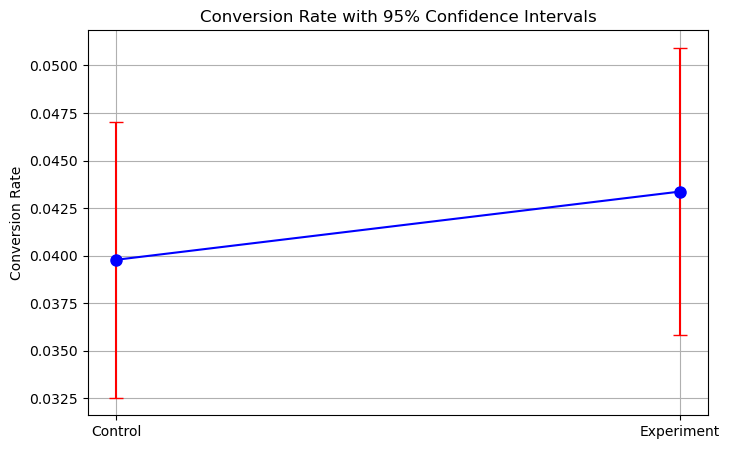

In [275]:
# Data points
categories = ['Control', 'Experiment']
means = [p_control, p_experiment]
errors = [margin_of_error_control, margin_of_error_experiment]

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(categories, means, yerr=errors, fmt='o', capsize=5, markersize=8, linestyle='-', color='blue', ecolor='red')

# Title and labels
plt.title('Conversion Rate with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


### Bootstrapping

Using bootstrapping is a great idea if you have high data variability, as you can see in the graph. This will allow us to get more reliable results for A/B testing.

In [276]:
# Function for bootstrap sampling
def bootstrap(data, num_samples, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.choice(data, size=(num_samples, len(data)), replace=True)

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Get conversion rates for control and experiment
control_conversion = control_group['conversion'].values
experiment_conversion = experiment_group['conversion'].values

# Perform bootstrap sampling
control_bootstrap_samples = bootstrap(control_conversion, n_bootstrap_samples, seed=42)
experiment_bootstrap_samples = bootstrap(experiment_conversion, n_bootstrap_samples, seed=42)



# Calculate mean conversion rates for each bootstrap sample
control_bootstrap_means = np.mean(control_bootstrap_samples, axis=1)
experiment_bootstrap_means = np.mean(experiment_bootstrap_samples, axis=1)

# Convert to DataFrame (optional, but allows for easier manipulation)
control_bootstrap_means = pd.DataFrame(control_bootstrap_means, columns=['means'])
experiment_bootstrap_means = pd.DataFrame(experiment_bootstrap_means, columns=['means'])

# Calculate overall mean for both groups
control_bootstrap_mean = control_bootstrap_means.mean()
experiment_bootstrap_mean = experiment_bootstrap_means.mean()

#### Statistical test

In [277]:
# Mean values ​​for control and experimental groups
control_mean = control_bootstrap_means['means'].values
experiment_mean = experiment_bootstrap_means['means'].values

p_value, significant = test_metric(control_mean, experiment_mean, 'means', test_name=True)

means: p-value = 5.98e-81, Mann-Whitney U test
Significant difference in means between groups.


P-value (5.98e-81) is lower than 0.05, so we can reject the null hypothesis. (Ha): The conversion rate between the old and new ranking algorithms is different.

#### Confidence Intervals

We want to estimate $\mu$ using $\overline{x}$,<br> 
formula for population mean:
$$\overline{x} \pm t \left(\frac{s}{\sqrt{n}}\right)$$

Where:
- $\overline{x}$ = sample mean,
- $s$ = sample standard deviation,
- $n$ = sample size.

In [278]:
# Calculate standard deviations for both groups
control_std = control_bootstrap_means.std()
experiment_std = experiment_bootstrap_means.std()

# Sample size
n_control_b = len(control_bootstrap_means)
n_experiment_b = len(experiment_bootstrap_means)

# Degrees of freedom
df_control = n_control_b - 1
df_experiment = n_experiment_b - 1

# T-score for 95% confidence interval (two-tailed)
t_score_control = stats.t.ppf(0.975, df_control)  # 0.975 for a 95% confidence interval
t_score_experiment = stats.t.ppf(0.975, df_experiment)

# Margin of error for control and experiment groups
margin_of_error_control_b = t_score_control * (control_std / np.sqrt(n_control_b))
margin_of_error_experiment_b = t_score_experiment * (experiment_std / np.sqrt(n_experiment_b))

# Confidence interval bounds for control group
lower_bound_control_b = control_bootstrap_mean - margin_of_error_control_b
upper_bound_control_b = control_bootstrap_mean + margin_of_error_control_b

# Confidence interval bounds for experiment group
lower_bound_experiment_b = experiment_bootstrap_mean - margin_of_error_experiment_b
upper_bound_experiment_b = experiment_bootstrap_mean + margin_of_error_experiment_b

# Print results
print(f"Control Group: Mean = {control_bootstrap_mean.values[0]*100:.2f}%, CI = [{lower_bound_control_b.values[0]*100:.2f}%, {upper_bound_control_b.values[0]*100:.2f}%]")
print(f"Experiment Group: Mean = {experiment_bootstrap_mean.values[0]*100:.2f}%, CI = [{lower_bound_experiment_b.values[0]*100:.2f}%, {upper_bound_experiment_b.values[0]*100:.2f}%]")



Control Group: Mean = 3.97%, CI = [3.95%, 4.00%]
Experiment Group: Mean = 4.33%, CI = [4.31%, 4.36%]


#### Visualization

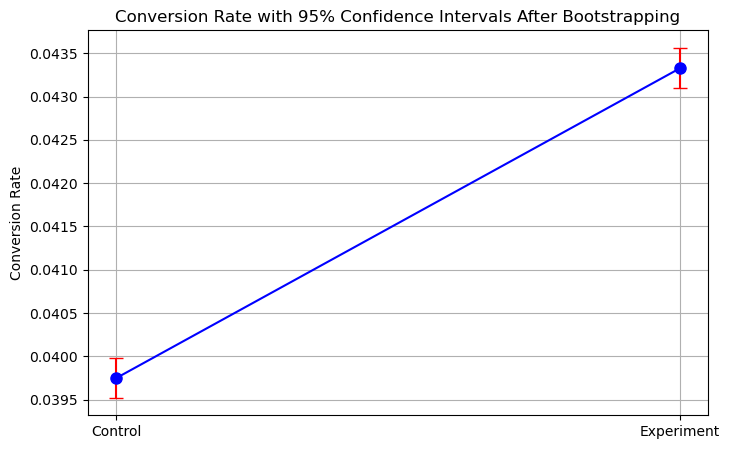

In [283]:
# Data points
categories = ['Control', 'Experiment']
means = [control_bootstrap_mean.values[0], experiment_bootstrap_mean.values[0]]
errors = [margin_of_error_control_b, margin_of_error_experiment_b]

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(categories, means, yerr=errors, fmt='o', capsize=5, markersize=8, linestyle='-', color='blue', ecolor='red')

# Title and labels
plt.title('Conversion Rate with 95% Confidence Intervals After Bootstrapping')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


### ARPU Analysis

In [280]:
# Filter out only rows with purchases (purchase_amount > 0)
purchase_data = df[df['purchase_amount'] > 0]

# Separate control and experiment group data
control_group_purchases = purchase_data[purchase_data['group'] == 'control']['purchase_amount']
experiment_group_purchases = purchase_data[purchase_data['group'] == 'experiment']['purchase_amount']

test_metric(control_group_purchases, experiment_group_purchases, metric_name='purchase_amount', test_name=True)

print(f"\nARPU for Control Group (excluding non-purchasers): {control_group_purchases.mean()}")
print(f"ARPU for Experiment Group (excluding non-purchasers): {experiment_group_purchases.mean()}")

purchase_amount: p-value = 0.0349, Mann-Whitney U test
Significant difference in purchase_amount between groups.

ARPU for Control Group (excluding non-purchasers): 51.377207207207206
ARPU for Experiment Group (excluding non-purchasers): 64.69289256198348


P-value (0.0349) is lower than 0.05, so we can reject the null hypothesis. (Ha): The ARPU between the old and new ranking algorithms is different.

#### Confidence Intervals

We want to estimate $\mu$ using $\overline{x}$,<br> 
formula for population mean:
$$\overline{x} \pm t \left(\frac{s}{\sqrt{n}}\right)$$

Where:
- $\overline{x}$ = sample mean,
- $s$ = sample standard deviation,
- $n$ = sample size.

In [281]:
# Calculate mean
mean_control = control_group_purchases.mean()
mean_experiment = experiment_group_purchases.mean()

std_control = control_group_purchases.std(axis=0)
std_experiment = experiment_group_purchases.std(axis=0)

n_control = len(control_group_purchases)
n_experiment = len(experiment_group_purchases)

# Degrees of freedom
degrees_of_freedom_control = n_control - 1
degrees_of_freedom_experiment = n_experiment - 1

# T-scores for a 95% confidence interval
confidence_level = 0.975  # Two-tailed test
t_score_control = stats.t.ppf(confidence_level, df=degrees_of_freedom_control)
t_score_experiment = stats.t.ppf(confidence_level, df=degrees_of_freedom_experiment)

# Calculate the margin of error (confidence interval) for both groups
margin_of_error_control1 = t_score_control * (std_control / np.sqrt(n_control))
margin_of_error_experiment1 = t_score_experiment * (std_experiment / np.sqrt(n_experiment))

# Upper and lower bounds
lower_bound_control1 = mean_control - margin_of_error_control1
upper_bound_control1 = mean_control + margin_of_error_control1

lower_bound_experiment1 = mean_experiment - margin_of_error_experiment1
upper_bound_experiment1 = mean_experiment + margin_of_error_experiment1

# Print results
print(f"Control Group: Mean = {mean_control:.2f}, CI = [{lower_bound_control1:.2f}, {upper_bound_control1:.2f}]")
print(f"Experiment Group: Mean = {mean_experiment:.2f}, CI = [{lower_bound_experiment1:.2f}, {upper_bound_experiment1:.2f}]")


Control Group: Mean = 51.38, CI = [40.07, 62.68]
Experiment Group: Mean = 64.69, CI = [53.34, 76.05]


#### Visualization

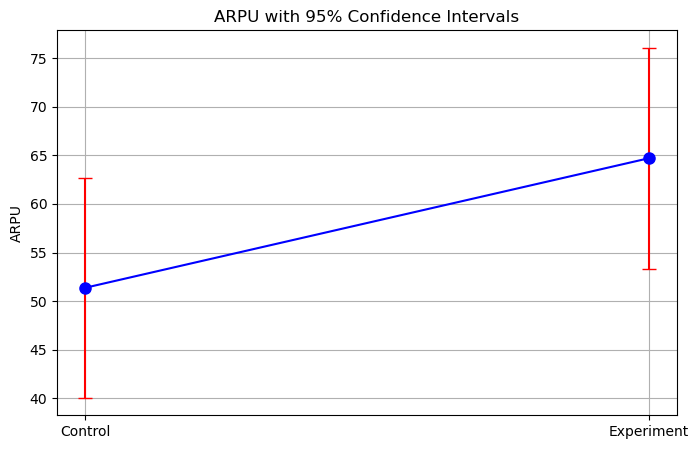

In [282]:
# Data points
categories = ['Control', 'Experiment']
means = [mean_control, mean_experiment]
errors = [margin_of_error_control1, margin_of_error_experiment1]

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(categories, means, yerr=errors, fmt='o', capsize=5, markersize=8, linestyle='-', color='b', ecolor='r')

# Title and labels
plt.title('ARPU with 95% Confidence Intervals')
plt.ylabel('ARPU')
plt.grid(True)
plt.show()

### Summary

![results](images/summary_results.jpg)

#### Interpretation
We observed an improvement in the **conversion rate** for the experiment group compared to the control group, with an **absolute increase** of **0.36%**. This increase remains **greater than** the Minimum Detectable Effect (**MDE**) of **0.3%**. However, before bootstrapping, the difference **was not statistically significant** at the 5% significance level, with a p-value of **0.546**.

After applying **bootstrapping**, the results showed a more precise estimate of the conversion rate difference. The **absolute difference** remains at **0.36%**, but the **p-value dropped significantly** to **5.98E-81**, indicating **strong statistical significance**. This suggests that the experiment group's conversion rate improvement is robust and likely due to the new ranking algorithm, rather than random variation. The bootstrapped confidence intervals for the conversion rates are narrower, providing more confidence in the observed effect.

For **ARPU**, we observed a significant **absolute increase of €13.32**, representing a **25.92% uplift**. This result remains statistically significant, with a p-value of **0.0348**. Users exposed to the new ranking algorithm are spending significantly more per session than those in the control group, which supports the conclusion that the new ranking algorithm positively impacts average revenue per user.


## Step 7 - Launch decision

### Decision
Given the results, the new ranking algorithm **should be launched**. The **conversion rate** improvement of **0.36%** is both **statistically significant** and **practically meaningful**, surpassing the Minimum Detectable Effect (MDE) of 0.3%. Additionally, the uplift in **ARPU** of **€13.32** indicates a substantial increase in user spending, further supporting the algorithm’s positive impact.

Since there are no trade-offs between the metrics, and both conversion rate and ARPU show clear improvements, the decision to launch the new ranking algorithm is well-supported by the data.



## References
1. Daniel Lee. (2022, February 25). *A/B Testing in Data Science Interviews by a Google Data Scientist | DataInterview*. YouTube. [https://www.youtube.com/watch?v=DUNk4GPZ9bw&t=207s&ab_channel=DataInterview](https://www.youtube.com/watch?v=DUNk4GPZ9bw&t=207s&ab_channel=DataInterview)
